# A cell-based model for a cluster
This model is Model B from Reynolds et al. 2020. It is an approximate model for a turbulent field in the perseus cluster.   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

First we initialise the survival class and set up the ALP parameters

In [2]:
s = alpro.Survival("1275b")
s.init_model()
s.set_params(1e-12 * 1e-9, 1e-13)

We can now initialise a random cell model with a given random number seed and plot $B_\perp$ as a function of line of sight distance $z$

Text(0.5, 0, '$z$ (kpc)')

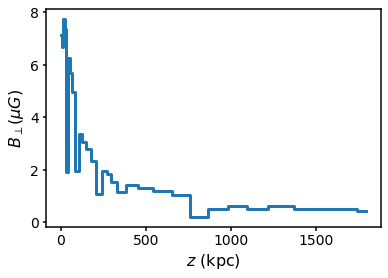

In [3]:
Lmax = 1800.0
i = 0
s.domain.create_box_array(Lmax, i, s.coherence_func, r0=0)
plt.step(s.domain.rcen, s.domain.B * 1e6, where="mid")
plt.ylabel("$B_\perp (\mu G)$")
plt.xlabel("$z$ (kpc)")

Now we can use ALPRO to compute the survival probability 

In [4]:
energies = np.logspace(3,4,1000)
P, Pradial = s.propagate(s.domain, energies, pol="both")

Let's plot the survival probability first using the inbuilt method

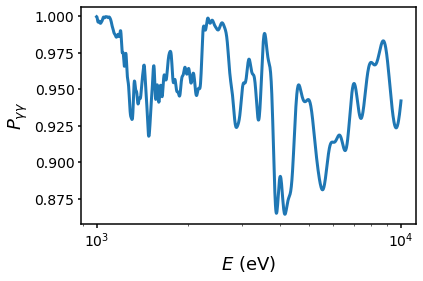

In [9]:
fig = s.default_plot(plot_kwargs = {"lw": 3}, mode="survival")

We can also plot the radial profile at the highest energy

[]

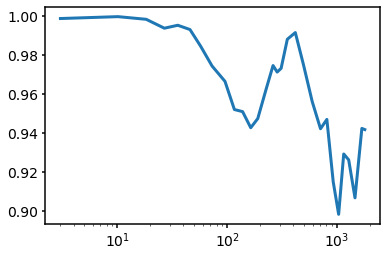

In [10]:
plt.plot(s.domain.rcen, 1.0 - Pradial[:,-1])
plt.semilogx()

We can also plot the radial profile in every energy bin using a colormesh plot

[]

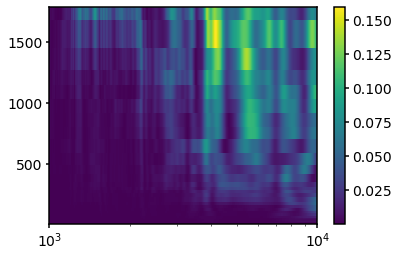

In [11]:
plt.pcolormesh(energies,s.domain.rcen, Pradial)
plt.colorbar()
plt.semilogx()

### Scaling of the coherence length 
Model B uses a scaling of the coherence length 